# GRIP:The Sparks Foundation

# Data Science & Business Analytics Intern

## Author: Amey Kulkarni

## Task1:Prediction using Supervised ML

To predict the percentage of marks of an student based on the number of hours they studied.

In [2]:
#Importing important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [4]:
#Reading the data
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#get more information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Check if null values are present in the dataset.
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### There is no null value present in the dataset.We can proceed to data visualisation.

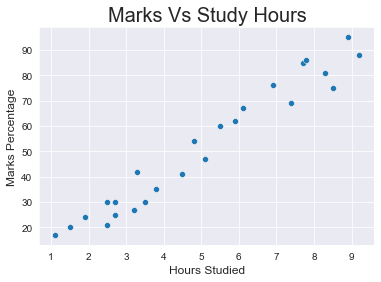

In [9]:
sns.set_style('darkgrid')
sns.scatterplot(y=df['Scores'], x= df['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

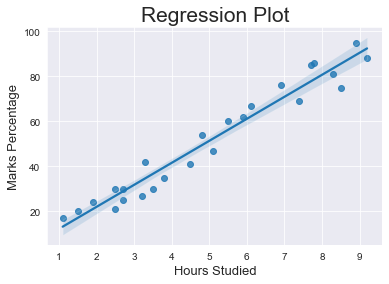

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [30]:
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=21)
plt.ylabel('Marks Percentage', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()
print(df.corr())

#### They are positively correlated.

## Training the Model

### 1) Splitting the Data

In [23]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model

In [24]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


## Predicting the Percentage of Marks

In [25]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


## Comparing the Predicted Marks with the Actual Marks

In [26]:
compare_scores = pd.DataFrame({'Actual Marks': test_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


## Comparing visually

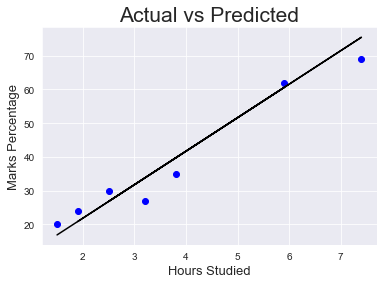

In [29]:
plt.scatter(x=test_X, y=test_y, color='blue')
plt.plot(test_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=21)
plt.ylabel('Marks Percentage', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()

## Evaluating the Model

In [28]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(test_y,pred_y))

Mean absolute error:  4.130879918502482


## What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [35]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### If a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.